<a href="https://colab.research.google.com/github/deepakshimpi001/DATA-SCIENCE-ASSIGNMENT/blob/main/Random_Forest_DT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use Random Forest to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/Fraud_check.csv")

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
data=pd.get_dummies(df,drop_first=True)

In [10]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [11]:
data["Taxable.Income"]=np.where(data["Taxable.Income"]<= 30000,1,0)
#1 for Risky
#0 for Good

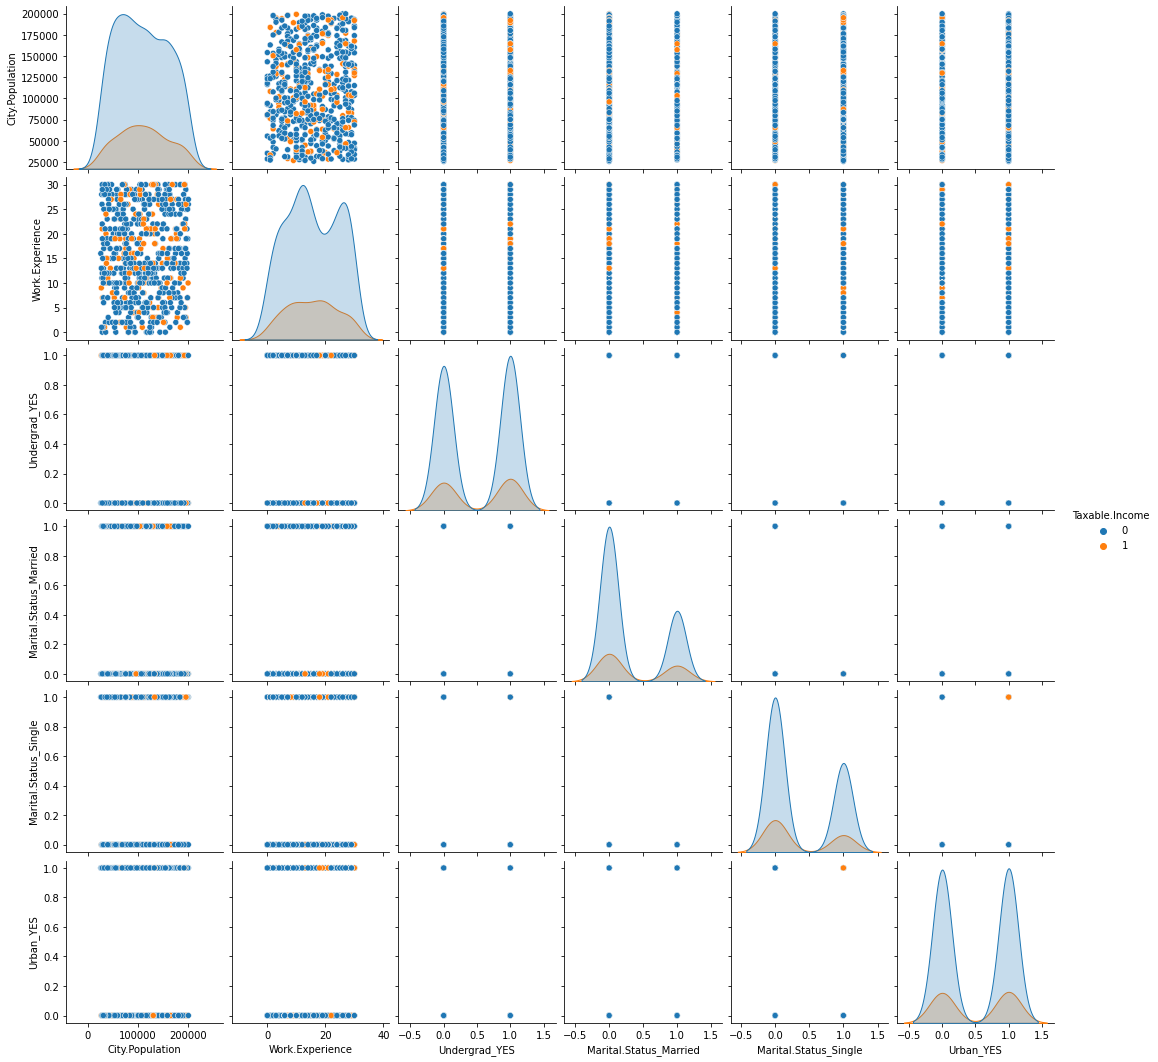

In [12]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=data,hue="Taxable.Income")

plt.show()


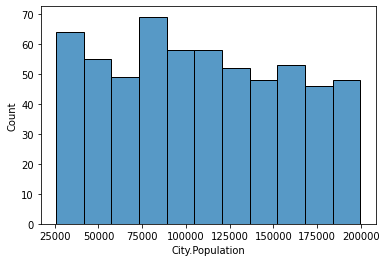

In [13]:
sns.histplot(x="City.Population",data=data)
plt.show()

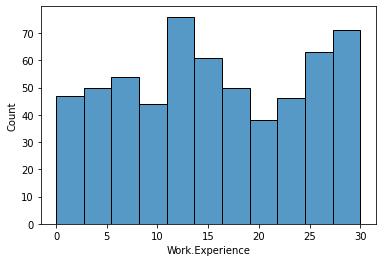

In [14]:
sns.histplot(x="Work.Experience",data=data)
plt.show()

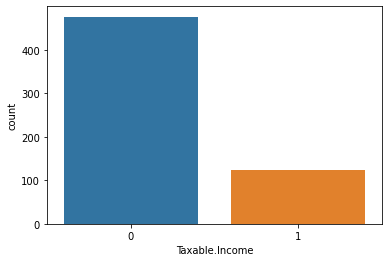

In [15]:
sns.countplot(x="Taxable.Income",data=data)
plt.show()

In [16]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0,50047,10,0,0,1,1
1,0,134075,18,1,0,0,1
2,0,160205,30,0,1,0,1
3,0,193264,15,1,0,1,1
4,0,27533,28,0,1,0,0


In [17]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])
df_norm.tail(10)


,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
590,0.341473,0.466667,0.0,1.0,0.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0


In [18]:
x=pd.DataFrame(df_norm)
y=data["Taxable.Income"]


In [19]:
# Bagged Decision Trees for Classification

In [20]:
from sklearn.model_selection import KFold,cross_val_score

In [21]:
kfold=KFold(n_splits=10)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [23]:
cart=DecisionTreeClassifier()
num_tree=100

In [24]:
model=BaggingClassifier(base_estimator=cart,n_estimators=num_tree)

In [25]:
result=cross_val_score(model,x,y,cv=kfold)

In [26]:
print(result.mean())

0.7366666666666666


In [27]:
# Random Forest Classification

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
num_trees =300
max_features = 4
kfold = KFold(n_splits=15)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results2 = cross_val_score(model2, x,y, cv=kfold)
print(results2.mean())

0.7416666666666667
